In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password

## Generate Reddit List

In [3]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
print(f"script by u/{username}")

# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]

for submission in reddit.subreddit('news').search('Test', sort='new', time_filter='all', limit=300):
    count+=1
    print(count)
    timestamps.append(submission.created)
    print(submission.created)
    value = datetime.datetime.fromtimestamp(submission.created)
    timestamps_conv.append(value.strftime('%Y-%m-%d %H:%M:%S'))
    print(value.strftime('%Y-%m-%d %H:%M:%S'))
    submission_title.append(submission.title)
    print(submission.title)
    likes.append(submission.ups)
    print(submission.ups)

MathGuyFromGallifrey
script by u/MathGuyFromGallifrey
1
1536793979.0
2018-09-12 16:12:59
Nazi Collaborator or National Hero? A Test for Lithuania
0
2
1536707172.0
2018-09-11 16:06:12
Many California Marijuana Products Failing Safety Tests
77
3
1536697150.0
2018-09-11 13:19:10
Many California marijuana products failing safety tests
479
4
1536614110.0
2018-09-10 14:15:10
Wall Street set for higher open as tax cut hopes outplay trade fears
24
5
1536568759.0
2018-09-10 01:39:19
Man stops to help stranded motorist who turned out to be hitman hired to kill him
3561
6
1536407624.0
2018-09-08 04:53:44
IIHS faults Uber for deactivating Volvo's automatic emergency braking in fatal crash
127
7
1536344858.0
2018-09-07 11:27:38
Department of National Defence establishes recreational cannabis policy
1495
8
1536293007.0
2018-09-06 21:03:27
Teacher struck and killed by a vehicle after school in front of children.
201
9
1536283100.0
2018-09-06 18:18:20
More Than 1,300 Animals Seized from Alleged Dog, C

101
1527200669.0
2018-05-24 15:24:29
Georgia doctor who made music videos during surgeries faced lawsuit over brain damage
1159
102
1527187151.0
2018-05-24 11:39:11
North Korea demolishes what it says is nuclear test site
21
103
1527186396.0
2018-05-24 11:26:36
Security troops on US nuclear missile base took LSD
273
104
1527138083.0
2018-05-23 22:01:23
Russian Nuclear Submarine Test-Launches 'Bulava' Intercontinental Ballistic Missiles
9
105
1527096231.0
2018-05-23 10:23:51
North Korea prepares to dismantle Punggyeri nuclear test site
23
106
1527081176.0
2018-05-23 06:12:56
Inside North Korea as it begins closing its main nuclear test site
21
107
1527018557.0
2018-05-22 12:49:17
Washington state to test drinking water for PFAS contamination linked to firefighting foam | The Seattle Times
304
108
1526863014.0
2018-05-20 17:36:54
Students present their Flint River water test results
74
109
1526722427.0
2018-05-19 02:33:47
Lab error causes boy, 5, to test positive for cocaine
386
110
1526

201
1518883491.0
2018-02-17 08:04:51
APD shoots Faith City Mission student who’d taken gun away from hostage-taker in facility’s chapel
116
202
1518735553.0
2018-02-15 14:59:13
FDA approves new blood test to detect concussions
96
203
1518668876.0
2018-02-14 20:27:56
Pot-users want judge to declare marijuana safe under US law
1032
204
1518588492.0
2018-02-13 22:08:12
Fentanyl Precursor being sold as LSD
49
205
1518560348.0
2018-02-13 14:19:08
Pakistan gang 'stole spinal fluid from women'
234
206
1518512011.0
2018-02-13 00:53:31
Missing elderly couple leads police on slow-speed chase
31
207
1518508307.0
2018-02-12 23:51:47
Passenger with broken wrist blocked at Lambert after cast allegedly contains explosive materials
56
208
1518506400.0
2018-02-12 23:20:00
99-year-old driver who killed teens in wrong-way crash dies
358
209
1518441475.0
2018-02-12 05:17:55
Wisconsin Sexual Assault Kit Tests Lead To 23 DNA Hits
268
210
1518354127.0
2018-02-11 05:02:07
California school science project tha

In [4]:
reddit_dict={"Time Created":timestamps,
           "Time Created (Human-Readable)":timestamps_conv,
           "Title": submission_title,
           "Likes": likes}

In [5]:
reddit_df=pd.DataFrame(reddit_dict)
mostliked_df = reddit_df.loc[reddit_df["Likes"]>=.5*reddit_df["Likes"].max(), :]
mostliked_df

,Time Created,Time Created (Human-Readable),Title,Likes
10,1.536093e+09,2018-09-04 13:22:04,DNA test proves man who paid $58k in child sup...,49480
22,1.534846e+09,2018-08-21 03:10:56,37 dead as measles cases spike in Europe,33939
35,1.533930e+09,2018-08-10 12:45:09,Multiple casualties in Canadian shooting,34864
170,1.521239e+09,2018-03-16 15:23:02,Wisconsin legislator to propose banning mariju...,37710
192,1.519601e+09,2018-02-25 15:30:03,Russian athlete filmed in 'I don’t do doping' ...,65368
236,1.517264e+09,2018-01-29 14:15:07,"Russia Is Banned From Paralympics, Again, for ...",36409


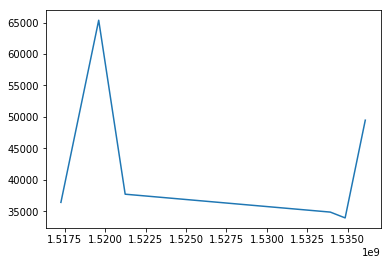

In [6]:
plt.plot(mostliked_df["Time Created"],mostliked_df["Likes"])
plt.show()

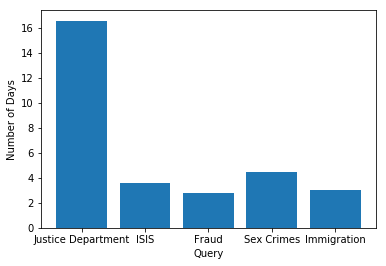

In [10]:
array_fb=[365/22, 365/101, 365/131, 365/82, 365/121]
name_fb=["Justice Department", "ISIS", "Fraud", "Sex Crimes", "Immigration"]
plt.bar(name_fb,array_fb)
plt.xlabel("Query")
plt.ylabel("Number of Days")
plt.show()

In [15]:
pd.DataFrame(array_fb).mean()

0    6.091756
dtype: float64